# Explicación de las Curvas ROC y el Área Bajo la Curva (AUC)

Las **Curvas ROC** (Receiver Operating Characteristic, o Característica Operativa del Receptor) y el **Área Bajo la Curva (AUC)** son herramientas gráficas y métricas clave para evaluar el rendimiento de modelos de clasificación binaria. Son especialmente útiles cuando se necesita entender la capacidad del modelo para distinguir entre las clases, independientemente del umbral de clasificación elegido.

## Curva ROC

Una Curva ROC es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación posibles. Representa la relación entre la **Tasa de Verdaderos Positivos (TPR)** y la **Tasa de Falsos Positivos (FPR)** a diferentes puntos de corte (umbrales) de probabilidad.

### Ejes de la Curva ROC

* **Eje Y: Tasa de Verdaderos Positivos (TPR)**
    También conocida como **Sensibilidad** o **Recall**. Mide la proporción de casos positivos reales que fueron correctamente identificados por el modelo.
    $$ \text{TPR} = \text{Sensibilidad} = \frac{\text{VP}}{\text{VP} + \text{FN}} $$
    Donde:
    * VP: Verdaderos Positivos
    * FN: Falsos Negativos

* **Eje X: Tasa de Falsos Positivos (FPR)**
    Representa la proporción de casos negativos reales que fueron incorrectamente identificados como positivos. Se calcula como 1 menos la Especificidad.
    $$ \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{VN}} $$
    Donde:
    * FP: Falsos Positivos
    * VN: Verdaderos Negativos
    * $\text{Especificidad} = \frac{\text{VN}}{\text{VN} + \text{FP}}$ (Así, $\text{FPR} = 1 - \text{Especificidad}$)

### Cómo se Genera la Curva ROC

Un modelo de clasificación binaria (como la regresión logística) produce una probabilidad de que una observación pertenezca a la clase positiva. Para clasificarla, se elige un **umbral de probabilidad** (por ejemplo, si la probabilidad > 0.5, clasificar como positiva; si no, como negativa).

La curva ROC se construye variando este umbral desde 0 hasta 1. Para cada umbral, se calculan la TPR y la FPR, y se dibuja un punto en el gráfico. La unión de todos estos puntos forma la curva ROC.


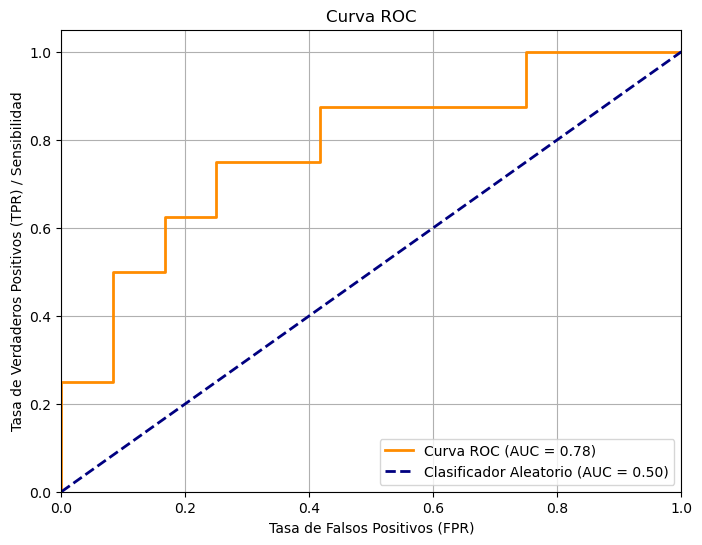

El Área Bajo la Curva (AUC) es: 0.78


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# --- 1. Datos de Ejemplo ---
# Supongamos que tenemos las probabilidades predichas por nuestro modelo
# para la clase positiva (ej. probabilidad de que el cliente compre el producto)
# y los verdaderos valores reales (0 para 'no compró', 1 para 'compró').

# Probabilidades predichas por el modelo (ej. de una regresión logística)
# Estas son las 'scores' o 'probabilidades' que tu modelo devuelve para la clase positiva.
y_pred_proba = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52,
                         0.51, 0.505, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35,
                         0.2, 0.15, 0.1, 0.05])

# Valores reales de la variable objetivo (0 o 1)
# Deben corresponder en orden con las probabilidades predichas.
y_true = np.array([1, 1, 0, 1, 1, 0, 1, 0,
                   1, 0, 0, 1, 0, 0, 0, 0,
                   1, 0, 0, 0])

# --- 2. Calcular la Curva ROC ---
# La función roc_curve de sklearn calcula las tasas de falsos positivos (fpr),
# las tasas de verdaderos positivos (tpr) y los umbrales de probabilidad.
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)

# --- 3. Calcular el Área Bajo la Curva (AUC) ---
roc_auc = auc(fpr, tpr)

# --- 4. Graficar la Curva ROC ---
plt.figure(figsize=(8, 6)) # Tamaño de la figura
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador Aleatorio (AUC = 0.50)')

# Configuración del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR) / Sensibilidad')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"El Área Bajo la Curva (AUC) es: {roc_auc:.2f}")


### --- Interpretación del Gráfico ---
- La línea de puntos azul representa un clasificador aleatorio. Cualquier modelo por debajo de esta línea es peor que el azar.
- La línea naranja representa la Curva ROC de tu modelo. Cuanto más se curve hacia la esquina superior izquierda (0,1), mejor será el rendimiento del modelo.
- El valor AUC (Area Under the Curve) resume el rendimiento general del modelo. Un AUC de 1.0 es perfecto, mientras que un AUC de 0.5 es tan bueno como el azar.

# Interpretación de un AUC de 0.78

Si el Área Bajo la Curva (AUC) de tu modelo de clasificación es de **0.78**, esto significa que tu modelo tiene un **buen rendimiento** en su capacidad para distinguir entre las clases positiva y negativa.

## ¿Qué Implica un AUC de 0.78?

1.  **Capacidad Discriminatoria:** Un AUC de 0.78 indica que hay un 78% de probabilidad de que el modelo clasifique correctamente un caso positivo seleccionado al azar por encima de un caso negativo seleccionado al azar. En otras palabras, el modelo es capaz de diferenciar entre las dos clases de manera efectiva en la mayoría de los casos.

2.  **Rendimiento Superior al Aleatorio:** Dado que 0.5 es el rendimiento de un clasificador aleatorio, un AUC de 0.78 está significativamente por encima de ese umbral, lo que confirma que tu modelo tiene un poder predictivo real.

3.  **Contexto de la Interpretación:**
    * Según las guías generales de interpretación (como las mencionadas en la explicación anterior):
        * **0.7 - 0.8:** Se considera un **"Buen modelo"** o "aceptable".
    * Esto sugiere que el modelo es útil para tu propósito de clasificación.

4.  **Comparación con Otros Modelos:** Si estuvieras comparando este modelo con otros, un AUC de 0.78 te daría una base sólida para decir que este modelo es mejor que uno con un AUC de 0.70, pero quizás no tan bueno como uno con 0.85.

## Consideraciones Adicionales

* **No es Perfecto:** Un AUC de 0.78 no es perfecto (que sería 1.0), lo que significa que el modelo aún cometerá algunos errores de clasificación (Falsos Positivos y Falsos Negativos).
* **Umbral de Clasificación:** El AUC te da una medida general del rendimiento del modelo **independientemente del umbral de clasificación**. Sin embargo, para la aplicación práctica, aún necesitarás elegir un umbral que equilibre la Sensibilidad y la Precisión según los costos de los errores en tu contexto específico. Por ejemplo, si los Falsos Negativos son muy costosos, podrías ajustar el umbral para aumentar la Sensibilidad, incluso si eso aumenta ligeramente los Falsos Positivos.
* **Contexto del Problema:** La "bondad" de un AUC de 0.78 también depende del dominio del problema. En algunos campos (como la detección de fraude o enfermedades raras), un AUC de 0.78 podría ser considerado excelente, mientras que en otros (donde se espera una alta precisión), podría ser solo aceptable.

En resumen, un AUC de 0.78 es un indicador positivo del rendimiento de tu modelo de clasificación, sugiriendo que tiene una buena capacidad para discriminar entre las clases.